# *Online Food Delivery Platform Analysis*

# Tasks

# Step 1 – Data Preparation & Cleaning
1. Load the dataset in pandas.
2. Handle missing values (if any).
3. Convert `Order Date` into datetime format.
4. Create new calculated columns:
    - `Delivery Delay (min) = Delivery Time – Promised Time`
    - `Order Month`
    - `Day of Week`
    - `Revenue = Quantity × Price`
5. Remove duplicate orders (if any).

- **Load dataset using Pandas**

In [1]:
import pandas as pd
df = pd.read_csv(r'C:\Users\ziaah\OneDrive\Desktop\Z_Work\My Work\Sir Raheel Task\food_delivery_orders_2024.csv')

- **Handle missing values (if any).**

In [2]:
df[df.isna().any(axis=1)]  #See rows with NaNs

,Order ID,Order Date,Order Hour,City,Customer ID,Customer Age,Payment Method,Cuisine,Restaurant Name,Restaurant Rating,...,Discount (PKR),Subtotal,Revenue,Promised Time (min),Delivery Time (min),Prep Time (min),Delivery Fee,Total Paid,Delivery Partner,Delivery Status
19,20,15-01-2024,22,Islamabad,50278,23,Card,Fast Food,Pakhtoon Desi,4.8,...,200,2471.26,2271.26,69,NaN,29,90.37,2361.63,Rider C,Late
31,32,10-01-2024,19,NaN,96950,68,Card,Biryani,Fsd Slice,4.5,...,50,3311.44,3261.44,44,39.0,24,182.66,3444.10,Rider C,On-Time
75,76,30-11-2024,20,Peshawar,41427,47,Wallet,Thai,Qissa Biryani,5.0,...,0,346.18,346.18,32,NaN,34,112.38,458.56,Rider E,Late
78,79,19-06-2024,12,Karachi,64935,57,Wallet,Biryani,Desi Dastarkhwan,3.7,...,50,5390.91,5340.91,51,NaN,28,188.59,5529.50,Rider E,Late
85,86,31-01-2024,16,Lahore,87192,37,Card,Desi,Haveli Grill,4.4,...,100,7466.68,7366.68,55,NaN,28,55.62,7422.30,Rider B,On-Time
168,169,22-08-2024,10,Multan,75869,69,Wallet,Chinese,Sohan Biryani,4.5,...,250,8711.65,8461.65,63,NaN,16,180.09,8641.74,Rider B,On-Time
193,194,19-09-2024,18,NaN,59687,35,Cash,Pizza,Wok & Roll,5.0,...,50,1404.60,1354.60,58,66.0,31,54.86,1409.46,Rider E,Late
207,208,25-05-2024,21,NaN,68772,38,Cash,Burger,BBQ Fsd,4.2,...,200,3003.09,2803.09,50,38.0,12,124.10,2927.19,Rider C,On-Time
231,232,09-12-2024,11,NaN,12059,21,Card,Sandwich,Pindi Pizza,3.7,...,150,6701.60,6551.60,53,53.0,22,42.38,6593.98,Rider E,On-Time


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order ID             245 non-null    int64  
 1   Order Date           245 non-null    object 
 2   Order Hour           245 non-null    int64  
 3   City                 241 non-null    object 
 4   Customer ID          245 non-null    int64  
 5   Customer Age         245 non-null    int64  
 6   Payment Method       245 non-null    object 
 7   Cuisine              245 non-null    object 
 8   Restaurant Name      245 non-null    object 
 9   Restaurant Rating    245 non-null    float64
 10  Quantity             245 non-null    int64  
 11  Unit Price           245 non-null    float64
 12  Discount (PKR)       245 non-null    int64  
 13  Subtotal             245 non-null    float64
 14  Revenue              245 non-null    float64
 15  Promised Time (min)  245 non-null    int

In [4]:
(df == 0.0).sum()  # Count how many zeros are in each column

Order ID                0
Order Date              0
Order Hour              0
City                    0
Customer ID             0
Customer Age            0
Payment Method          0
Cuisine                 0
Restaurant Name         0
Restaurant Rating       0
Quantity                0
Unit Price              0
Discount (PKR)         99
Subtotal                0
Revenue                 0
Promised Time (min)     0
Delivery Time (min)     0
Prep Time (min)         0
Delivery Fee            0
Total Paid              0
Delivery Partner        0
Delivery Status         0
dtype: int64

In [5]:
df[(df == 0.0).any(axis=1)]  # See rows containing at least one 0.0

,Order ID,Order Date,Order Hour,City,Customer ID,Customer Age,Payment Method,Cuisine,Restaurant Name,Restaurant Rating,...,Discount (PKR),Subtotal,Revenue,Promised Time (min),Delivery Time (min),Prep Time (min),Delivery Fee,Total Paid,Delivery Partner,Delivery Status
0,1,12-10-2024,10,Quetta,10058,39,Card,Pasta,Zafran Biryani,3.7,...,0,3054.48,3054.48,42,39.0,29,165.24,3219.72,Rider E,On-Time
1,2,01-03-2024,21,Peshawar,16452,55,Cash,Sandwich,Shinwari Pizza,4.1,...,0,2234.62,2234.62,46,52.0,30,98.11,2332.73,Rider E,Late
6,7,20-05-2024,18,Islamabad,91777,51,Wallet,BBQ,Isb Pie,4.5,...,0,7135.40,7135.40,60,53.0,13,46.63,7182.03,Rider E,On-Time
10,11,18-08-2024,21,Lahore,41529,58,Card,Desi,Desi Darbar,3.9,...,0,306.75,306.75,58,63.0,21,95.27,402.02,Rider C,Late
15,16,13-12-2024,13,Faisalabad,95571,41,Wallet,Pizza,Karahi King,4.1,...,0,3356.94,3356.94,59,63.0,23,67.19,3424.13,Rider E,Late
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,233,28-04-2024,10,Faisalabad,21842,50,Card,Desi,Fsd Slice,3.9,...,0,5050.85,5050.85,36,30.0,14,171.90,5222.75,Rider F,On-Time
235,236,19-10-2024,21,Rawalpindi,41625,56,Cash,Thai,Rajju Biryani,4.4,...,0,1447.05,1447.05,58,56.0,29,76.08,1523.13,Rider F,On-Time
236,237,03-09-2024,13,Lahore,83498,64,Wallet,Burger,BBQ Fort,4.1,...,0,714.86,714.86,32,33.0,23,111.78,826.64,Rider E,Late
237,238,19-09-2024,18,Peshawar,53657,35,Cash,Desi,BBQ Shinwari,3.9,...,0,4199.20,4199.20,41,32.0,21,169.67,4368.87,Rider E,On-Time


In [6]:
df['City'] = df['City'].fillna('GHQ')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order ID             245 non-null    int64  
 1   Order Date           245 non-null    object 
 2   Order Hour           245 non-null    int64  
 3   City                 245 non-null    object 
 4   Customer ID          245 non-null    int64  
 5   Customer Age         245 non-null    int64  
 6   Payment Method       245 non-null    object 
 7   Cuisine              245 non-null    object 
 8   Restaurant Name      245 non-null    object 
 9   Restaurant Rating    245 non-null    float64
 10  Quantity             245 non-null    int64  
 11  Unit Price           245 non-null    float64
 12  Discount (PKR)       245 non-null    int64  
 13  Subtotal             245 non-null    float64
 14  Revenue              245 non-null    float64
 15  Promised Time (min)  245 non-null    int

- **Convert Order Date into datetime format.**

In [8]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

- **Create new calculated columns:**
    - `Delivery Delay (min) = Delivery Time – Promised Time`
    - `Order Month`
    - `Day of Week`
    - `Revenue = Quantity × Price`

In [9]:
df['Delivery Delay (min)'] = (df['Delivery Time (min)'] * df['Promised Time (min)'])
df['Delivery Delay (min)'].reset_index().head()

,index,Delivery Delay (min)
0,0,1638.0
1,1,2392.0
2,2,3762.0
3,3,2806.0
4,4,5372.0


In [10]:
df['Order Month'] = df['Order Date'].dt.strftime('%B')

In [11]:
df['Order Day'] = df['Order Date'].dt.day_name()

In [12]:
Revenue = (df['Quantity'] * df['Total Paid']).reset_index().head()
Revenue

,index,0
0,0,9659.16
1,1,2332.73
2,2,26385.00
3,3,4573.62
4,4,9857.62


- **Remove any duplicate entries.**

In [13]:
df.duplicated().sum()

np.int64(5)

# Step 2 – Exploratory Data Analysis (EDA)
Perform at **least 10 analyses** with pandas + numpy + seaborn/matplotlib:
  - Most popular **cuisine types**Pizza,Burger,Desi,Chinese, etc.)
  - Average **delivery delay** by city
  - Top 5 restaurants by **total revenue**
  - Distribution of **payment methods** (Cash, Card, Wallet)
  - Average **order value** by customer age groups ( <20 , 20–29 , 30–39 , 40+ )
  - Peak **ordering days** of the week
  - Monthly revenue trend
  - Average **ratings** by cuisine type
  - % of orders delivered **late vs on-time**
  - Correlation between **delivery time & customer rating**

- **Most popular cuisine typesPizza,Burger,Desi,Chinese, etc.)**

In [14]:
cuisine = df['Cuisine'].value_counts().head(10).reset_index()
cuisine

,Cuisine,count
0,Fast Food,34
1,Biryani,27
2,Pizza,27
3,Desi,26
4,Sandwich,24
5,Pasta,23
6,Burger,23
7,BBQ,22
8,Chinese,21
9,Thai,18


- **Average delivery delay by city**

In [15]:
df.groupby('City')['Delivery Delay (min)'].mean().head(10).reset_index()

,City,Delivery Delay (min)
0,Faisalabad,2198.147059
1,GHQ,2563.250000
2,Islamabad,2776.250000
3,Karachi,2466.968750
4,Lahore,2595.361111
5,Multan,2400.000000
6,Peshawar,2677.115385
7,Quetta,2528.909091
8,Rawalpindi,2744.945946


- **Top 5 restaurants by total revenue**

In [16]:
Top_restaurant = df.groupby('Restaurant Name')['Revenue'].sum().sort_values(ascending=False).head().reset_index()
Top_restaurant

,Restaurant Name,Revenue
0,Fsd Slice,49256.67
1,Wok & Roll,47749.92
2,Khi Slice,45360.47
3,BBQ Fort,45069.78
4,Wok City,42183.14


- **Distribution of payment methods (Cash, Card, Wallet)**

In [17]:
payment_method = round(df['Payment Method'].value_counts(normalize=True) * 100,2)
(payment_method.astype(str) + '%').reset_index().set_index('Payment Method')

,proportion
Payment Method,
Card,40.0%
Cash,32.24%
Wallet,27.76%


- **Average order value by customer age groups ( <20 , 20–29 , 30–39 , 40+ )**

In [18]:
df['Age_group'] = df['Customer Age'].apply(lambda x : '<20' if x<20 else  '20-29' if x<30 else '30-39' if x<40 else '40+')
age_groups = df[['Customer Age','Age_group']].head(15)
age_groups

,Customer Age,Age_group
0,39,30-39
1,55,40+
2,49,40+
3,53,40+
4,43,40+
5,34,30-39
6,51,40+
7,52,40+
8,22,20-29
9,36,30-39


- **Peak ordering days of the week**

In [19]:
daily_order = df['Order Day'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).reset_index()
daily_order

,Order Day,count
0,Monday,33
1,Tuesday,39
2,Wednesday,31
3,Thursday,34
4,Friday,31
5,Saturday,39
6,Sunday,38


- **Monthly revenue trend**

In [20]:
Monthly_revenue = df.groupby('Order Month')['Revenue'].sum().reindex(
    ['January', 'February', 'March', 'May', 'June', 'July', 'August','September','October','November','December']
).reset_index()
Monthly_revenue

,Order Month,Revenue
0,January,98978.49
1,February,64283.05
2,March,86159.88
3,May,80541.30
4,June,148842.03
5,July,64329.07
6,August,90758.85
7,September,81012.82
8,October,62839.70
9,November,76291.64


- **Average ratings by cuisine type**

In [21]:
cuisine_type = df.groupby('Cuisine')['Restaurant Rating'].mean().head(10).reset_index()
cuisine_type

,Cuisine,Restaurant Rating
0,BBQ,4.209091
1,Biryani,4.237037
2,Burger,4.200000
3,Chinese,4.247619
4,Desi,4.296154
5,Fast Food,4.302941
6,Pasta,4.326087
7,Pizza,4.251852
8,Sandwich,4.112500
9,Thai,4.244444


- **% of orders delivered late vs on-time**

In [22]:
df['Delivery Status'] = df['Delivery Delay (min)'].apply(lambda x: 'Late' if x > 0 else 'On-time')
df['Delivery Status'].value_counts(normalize=True) * 100

Delivery Status
Late       97.959184
On-time     2.040816
Name: proportion, dtype: float64

- **Correlation between delivery time & customer rating**

In [23]:
df['Delivery Time (min)'] = pd.to_numeric(df['Delivery Time (min)'], errors='coerce')
df['Restaurant Rating'] = pd.to_numeric(df['Restaurant Rating'], errors='coerce')

In [24]:
corr = df['Delivery Time (min)'].corr(df['Restaurant Rating'])
print("Correlation between Delivery Time and Customer Rating:", corr)

Correlation between Delivery Time and Customer Rating: 0.09478208142192729


# Step 3 – Advanced Analysis
1. Identify the ****top 10 loyal customers**** (highest number of orders).
2. Find which **city has the highest average order value.**
3. Detect if **premium restaurants** (rating > 4.5) generate higher revenue compared to others.
4. Analyze the effect of **delivery delay** on customer ratings (late delivery = lower ratings?).
5. Segment customers into groups (low spenders, medium, high spenders).

1. Identify the **top 10 loyal customers** (highest number of orders).

In [25]:
df.groupby('Customer ID').size().sort_values(ascending=False).head(10).reset_index()

,Customer ID,0
0,30660,2
1,72503,2
2,72468,2
3,73730,2
4,81583,2
5,10058,1
6,11491,1
7,10334,1
8,13169,1
9,13170,1


2. Find which **city has the highest average order value.**

In [26]:
df.groupby('City')['Revenue'].mean().reset_index().sort_values('Revenue', ascending=False).head()

,City,Revenue
5,Multan,4691.075000
0,Faisalabad,4670.445294
4,Lahore,4251.924054
3,Karachi,4107.517879
2,Islamabad,3865.433333


3. Detect if **premium restaurants** (rating > 4.5) generate higher revenue compared to others.

In [27]:
df['Premium Restaurant'] = df['Restaurant Rating'].apply(lambda x: 'Premium' if x > 4.5 else 'Regular')

In [28]:
df.groupby('Premium Restaurant')['Revenue'].mean().reset_index()

,Premium Restaurant,Revenue
0,Premium,4152.759697
1,Regular,4080.520838


In [29]:
df.groupby('Premium Restaurant')['Revenue'].sum().reset_index()

,Premium Restaurant,Revenue
0,Premium,274082.14
1,Regular,730413.23


4. Analyze the effect of **delivery delay** on customer ratings (late delivery = lower ratings?).

In [50]:
rating = df.groupby('Cuisine')['Restaurant Rating'].mean().reset_index()
rating

,Cuisine,Restaurant Rating
0,BBQ,4.209091
1,Biryani,4.237037
2,Burger,4.200000
3,Chinese,4.247619
4,Desi,4.296154
5,Fast Food,4.302941
6,Pasta,4.326087
7,Pizza,4.251852
8,Sandwich,4.112500
9,Thai,4.244444


In [30]:
df.groupby('Delivery Status')['Restaurant Rating'].mean().reset_index()

,Delivery Status,Restaurant Rating
0,Late,4.240833
1,On-time,4.480000


5. DSegment customers into groups (low spenders, medium, high spenders).

In [31]:
customer_spend = (df.groupby('Customer ID')['Revenue'].sum().reset_index(name='Total Spend'))

In [32]:
customer_spend['Segment'] = pd.qcut(customer_spend['Total Spend'], q=3, labels=['Low Spender', 'Medium Spender', 'High Spender'])

In [33]:
def segment_spender(x):
    if x < 500:
        return 'Low Spender'
    elif x < 2000:
        return 'Medium Spender'
    else:
        return 'High Spender'

customer_spend['Segment'] = customer_spend['Total Spend'].apply(segment_spender)

In [34]:
customer_spend['Segment'].value_counts().reset_index()

,Segment,count
0,High Spender,172
1,Medium Spender,61
2,Low Spender,7


In [35]:
customer_spend.groupby('Segment')['Total Spend'].sum().reset_index()

,Segment,Total Spend
0,High Spender,922939.67
1,Low Spender,2253.47
2,Medium Spender,79302.23


# Step 4: Comparison

- Compare **cash vs digital payments** in terms of late delivery trends.

In [36]:
late_delivery = df[df['Delivery Status'] == 'Late']
late_delivery

,Order ID,Order Date,Order Hour,City,Customer ID,Customer Age,Payment Method,Cuisine,Restaurant Name,Restaurant Rating,...,Prep Time (min),Delivery Fee,Total Paid,Delivery Partner,Delivery Status,Delivery Delay (min),Order Month,Order Day,Age_group,Premium Restaurant
0,1,2024-10-12,10,Quetta,10058,39,Card,Pasta,Zafran Biryani,3.7,...,29,165.24,3219.72,Rider E,Late,1638.0,October,Saturday,30-39,Regular
1,2,2024-03-01,21,Peshawar,16452,55,Cash,Sandwich,Shinwari Pizza,4.1,...,30,98.11,2332.73,Rider E,Late,2392.0,March,Friday,40+,Regular
2,3,2024-04-06,9,Rawalpindi,56461,49,Cash,Fast Food,Smokey Pindi,4.9,...,19,198.01,6596.25,Rider E,Late,3762.0,April,Saturday,40+,Premium
3,4,2024-11-06,9,Islamabad,21350,53,Card,BBQ,Pakhtoon Desi,4.9,...,38,42.34,1524.54,Rider C,Late,2806.0,November,Wednesday,40+,Premium
4,5,2024-06-14,17,Quetta,83753,43,Wallet,Burger,BBQ Quetta,4.3,...,17,119.77,4928.81,Rider E,Late,5372.0,June,Friday,40+,Regular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,154,2024-04-28,12,Rawalpindi,30660,28,Cash,Thai,Smokey Pindi,3.7,...,43,118.89,1104.05,Rider D,Late,5159.0,April,Sunday,20-29,Regular
241,168,2024-06-22,18,Islamabad,73730,54,Wallet,Pasta,Isb Pie,4.6,...,11,103.70,2846.00,Rider D,Late,2052.0,June,Saturday,40+,Premium
242,84,2024-08-16,22,Peshawar,81583,28,Wallet,BBQ,Shinwari Pizza,3.8,...,21,77.65,4822.85,Rider F,Late,1088.0,August,Friday,20-29,Regular
243,118,2024-06-04,13,Faisalabad,72468,63,Wallet,Pizza,China Hut,4.5,...,14,150.13,2958.01,Rider B,Late,1394.0,June,Tuesday,40+,Regular


In [37]:
late_delivery['Payment Method'] = late_delivery['Payment Method'].apply(lambda x:'Cash payment' if x == 'Cash' else 'digital payment')

C:\Users\ziaah\AppData\Local\Temp\ipykernel_22080\1961668300.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  late_delivery['Payment Method'] = late_delivery['Payment Method'].apply(lambda x:'Cash payment' if x == 'Cash' else 'digital payment')


In [38]:
late_delivery.groupby('Payment Method')['Delivery Status'].count().sort_values(ascending=False).reset_index()

,Payment Method,Delivery Status
0,digital payment,161
1,Cash payment,79


- Check if **older customers (40+)** prefer different cuisines compared to younger ones.

In [39]:
df['Age group'] = df['Age_group'].apply(lambda x:'40+' if x =='40+' else 'younger')

In [40]:
df.groupby(['Age_group','Cuisine']).size().reset_index().set_index('Age_group').rename(columns={0:'Quantity'})

,Cuisine,Quantity
Age_group,,
20-29,BBQ,4
20-29,Biryani,7
20-29,Burger,2
20-29,Chinese,7
20-29,Desi,4
20-29,Fast Food,5
20-29,Pasta,4
20-29,Pizza,2
20-29,Sandwich,4


# Step 5 – Visualizations
- Make at least **10 different visualizations,** covering:
    - Bar charts (top restaurants, cuisines, etc.)
    - Line graphs (monthly revenue, daily orders)
    - Pie charts (payment methods, cuisine distribution)
    - Histograms (order value distribution, age groups)
    - Heatmap (correlation matrix between revenue, delay, rating, etc.)

- Bar charts (top restaurants, cuisines, etc.)

In [41]:
import matplotlib.pyplot as pt

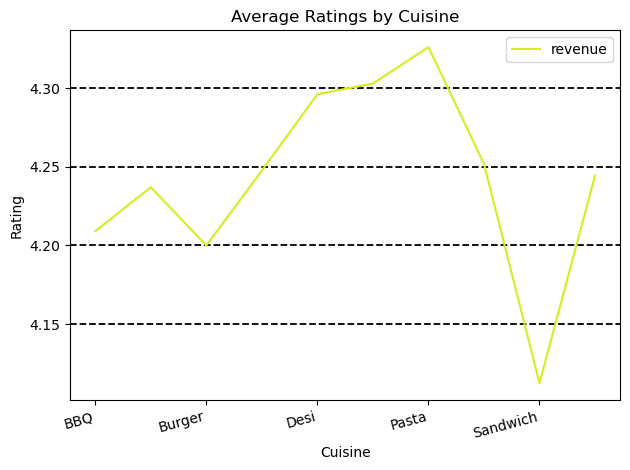

In [60]:
rating.plot(x='Cuisine', y='Restaurant Rating', kind='line', ls='-',color='#D5ED21',label='revenue')

pt.title("Average Ratings by Cuisine")
pt.xlabel("Cuisine")
pt.ylabel("Rating")
pt.xticks(rotation=15, ha='right')
pt.grid(axis='y', linestyle='--', lw=1.3,c='#000000')
pt.legend()
pt.tight_layout()
pt.show()

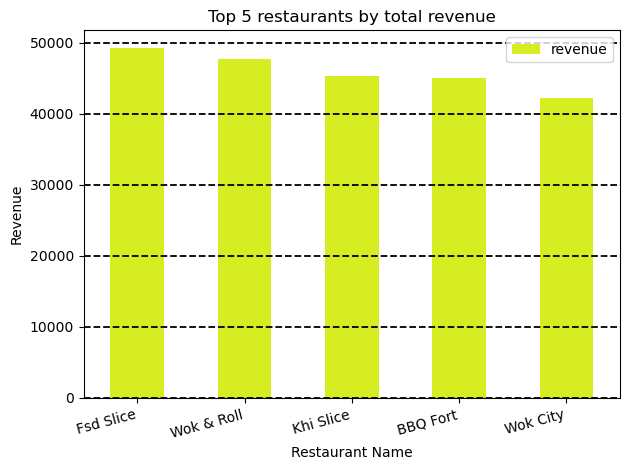

In [42]:
Top_restaurant.plot(x='Restaurant Name', y='Revenue', kind='bar', ls='-',color='#D5ED21',label='revenue')

pt.title("Top 5 restaurants by total revenue")
pt.xlabel("Restaurant Name")
pt.ylabel("Revenue")
pt.xticks(rotation=15, ha='right')
pt.grid(axis='y', linestyle='--', alpha=1, lw=1.3,c='#000000')
pt.legend()
pt.tight_layout()
pt.show()

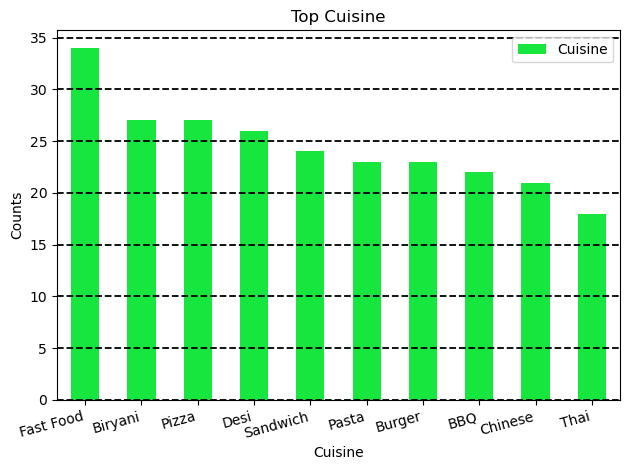

In [43]:
cuisine.plot(x='Cuisine', y='count', kind='bar', ls='-',color='#17E63F',label='Cuisine')

pt.title("Top Cuisine")
pt.xlabel("Cuisine")
pt.ylabel("Counts")
pt.xticks(rotation=15, ha='right')
pt.grid(axis='y', linestyle='--', alpha=1, lw=1.3,c='#000000')
pt.legend()
pt.tight_layout()
pt.show()

- Line graphs (monthly revenue, daily orders)

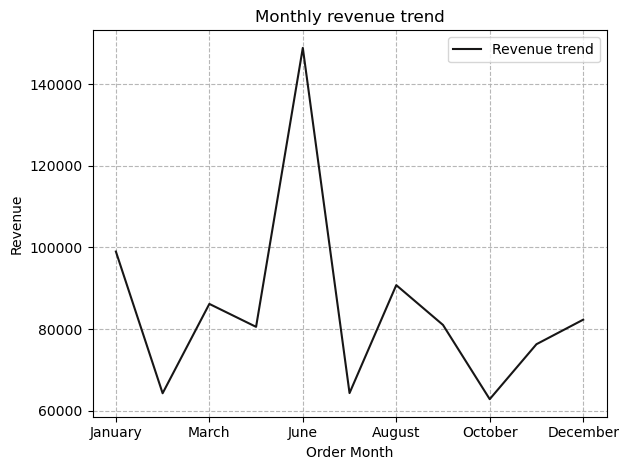

In [44]:
Monthly_revenue.plot(x= "Order Month", y= "Revenue",kind='line', color='#171616',label = 'Revenue trend')

pt.title("Monthly revenue trend")
pt.xlabel("Order Month")
pt.ylabel("Revenue")
pt.legend()
pt.grid(True, linestyle='--', alpha=0.9)
pt.tight_layout()
pt.show()

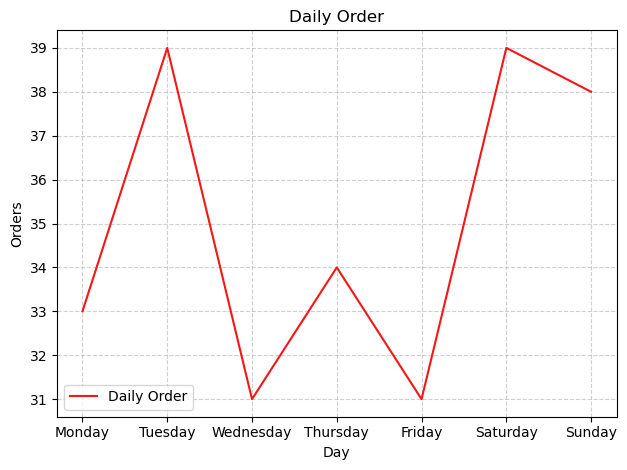

In [45]:
daily_order.plot(x= "Order Day", y= "count",kind='line', color='#F51616',label = 'Daily Order')

pt.title("Daily Order")
pt.xlabel("Day")
pt.ylabel("Orders")
pt.legend()
pt.grid(True, linestyle='--', alpha=0.6)
pt.tight_layout()
pt.show()

- Pie charts (payment methods, cuisine distribution)

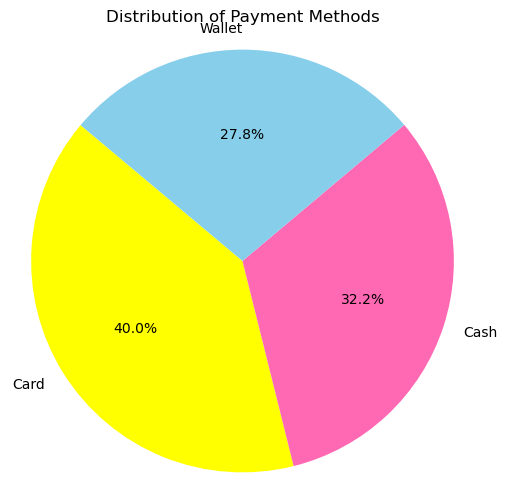

In [46]:
import matplotlib.pyplot as plt

payment_counts = df["Payment Method"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(payment_counts, 
        labels=payment_counts.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=['yellow', '#FF69B4', '#87CEEB'])  # you can change/remove colors

plt.title("Distribution of Payment Methods")
plt.axis('equal')  # makes it a circle
plt.show()

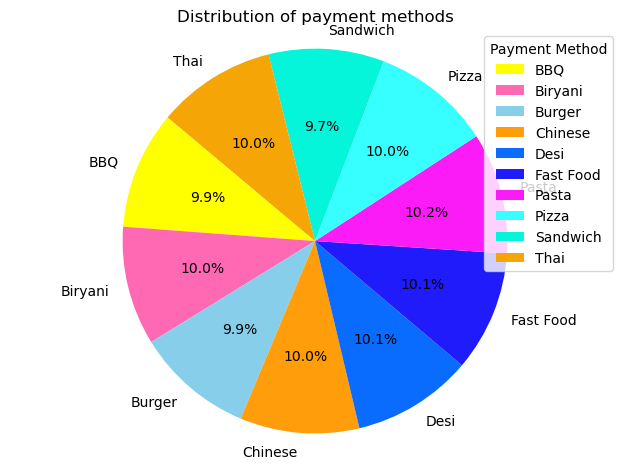

In [47]:
pt.pie(cuisine_type['Restaurant Rating'], labels=cuisine_type['Cuisine'], autopct='%1.1f%%', startangle=140, colors=['yellow', '#FF69B4', '#87CEEB','#FF9D0A','#0A6CFF','#1F1BFA','#FA1BF6','#38FFFF','#05F5DA','#F5A505'] )

pt.title("Distribution of payment methods")
pt.axis('equal')  
pt.legend(title="Payment Method")
pt.tight_layout()
pt.show()

- Histograms (order value distribution, age groups)

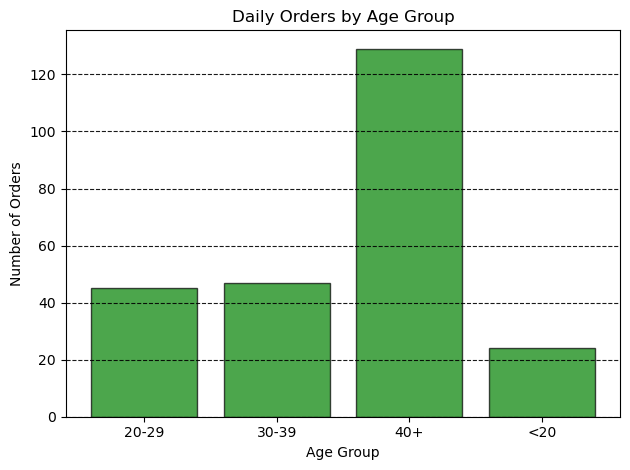

In [48]:
age_counts = df['Age_group'].value_counts().sort_index()

pt.bar(age_counts.index, age_counts.values, color='g', edgecolor='black', alpha=0.7)
pt.title("Daily Orders by Age Group")
pt.xlabel("Age Group")
pt.ylabel("Number of Orders")
pt.grid(True, ls='--', alpha=0.9,axis='y',color='#000000')
pt.tight_layout()
pt.show()

- Heatmap (correlation matrix between revenue, delay, rating, etc.)